# Exploration of Models 
This notebook aims to explore the models that used to construct the model used as the basis for this project. 

## Models from Luke Vassor's 2019 Project
looking at models in the SI of the report



## West et al. 2001
West et al 2001

the rate of energy transformation is the sum of two terms, one of which represents the maintenance of existing tissue, and the other, the creation of new tissue. This is expressed by the conservation of energy equation:

* $B = \sum [N_c B_c + E_c \frac{dN_c}{ dt}]$
    - where:
        
        $B$ = average resting metabolic rate of the organism at time $t$
        
        $B_c$ = metabolic rate of a single cell
        
        $E_c$ = metabolic energy required to create a cell
        
        $N_c$ = the total number of cells 

        **the sum is over all types of tissue**
<p>&nbsp;</p>
    - $N_c B_c$, is the power needed to sustain the organism in all of its activities
    - $E_c \frac{dN_c}{ dt}$ is the power allocated to production of new cells
    - $E_c, B_c$, and the mass of a cell, $m_c$,are assumed to be independent of $m$ remaining constant throughout growth and development.
    - At any time $t$ the total body mass $m = m_c N_c$




### Change in mass dm/dt

At a given point in time:
\begin{align}
B &= N_c B_c + E_c \frac{dN_c}{ dt}\\
\text{}\\
\text{Rearrange to get:}\\
\frac{dN_c}{ dt} &= \frac{B - N_c B_c}{E_c}\\
\text{}\\
\text{Substitute: }  m &= N_c m_c\\
\frac{dm}{dt} &= \frac{B m_c - N_c m_c B_c}{E_c}\\
\frac{dm}{dt} &= \frac{B m_c}{E_c} - \frac{m B_c}{E_c}\\
\frac{dm}{dt} &= (\frac{m_c}{E_c})B - (\frac{B_c}{E_c})m\\
\frac{dm}{dt} &= (\frac{m_c}{E_c})B - (\frac{B_c}{E_c})m\\
\text{}\\
\text{Note: } B &= B_0 m ^\frac{3}{4}\\
\text{Therefore:}\\
\frac{dm}{dt} &= (\frac{m_c}{E_c})B_0 m ^\frac{3}{4} - (\frac{B_c}{E_c})m\\
\text{}\\
\text{Substitute:}\\
a \equiv \frac{B_0 m_c}{E_c} & \ \ \ \ b \equiv \frac{B_c}{E_c}\\
\frac{dm}{dt} &= am^\frac{3}{4} - bm
\end{align}

- $a$ = growth rate
- $b$ = maintenace cost per cell







### Calculation of $a$
$a$ is the rate at which an organism is expected to grow in $g^\frac{1}{4} / day$

- $a = \frac {B_0 m_c}{E_c}$ 
    - where:
        $B_0$ = A constant for a given taxon, here the value for poikilotherms used, see Luke's report for more detail and refs. West et al. 2001 originally used homeotherm value.
        - $m_c$ = mass of a single cell
        - $E_c$ = energy needed to create a cell *in viro* (in viruses? in vitro mispelt twice?)

\begin{align}
a &= \frac {B_0 m_c}{E_c}\\
a &= \frac {(1.410^-1 W)(3\cdot10^-9 g)}{1.69 \cdot10^-5 J}\\
a &= 2.4867 \cdot10^-5 g/s\\
\end{align}
##### convert from seconds to days
$$
2.4867 \cdot10^-5 \ \ g/s \cdot24 \cdot60 \cdot60
$$

$$
a = 2.1485 \ \ g^\frac{1}{4}/day 
$$


In [1]:
# load in data for the average energy of a fish cell from Lucas' SI data 
    #(Cummins & Wuycheck, 1971; Steimle& Russell, 1980; Hartman & Brandt, 1995)
import pandas as pd
import scipy as sc 
fish = pd.read_csv("../data/test_data_lukeSI.csv")
Et = sc.mean(fish["Wet weight KJ/g"]) * 1000 # convert from KJ/g -> J/g
print("The mean wet weight from the data: " + str(Et))


The mean wet weight from the data: 5634.80182857


In [2]:
B0 = 1.4 * 10**-1 # taxon constant (poikilotherms)
mc = 3 * 10**-9 # mass of a cell
Ec  = Et * mc # Energy content of a poikilotherm cell * 
print("Ec is equal to: " + str(Ec))
a = (B0 * mc) / Ec

#### Convert from g^1/4 s^-1 to g^1/4 d^-1 ####
a = a * 60 * 60 * 24 #  * seconds * minutes *hours
print("a is equal to: " + str(a))

Ec is equal to: 1.69044054857e-05
a is equal to: 2.14665934455


In [3]:
def calc_a(B0, mc, Et):
    Ec = Et * mc
    a = (B0 * mc) / Ec # calculated in seconds; g^1/4 s^-1
    #convert to days
    a = a * 60 * 60 * 24 #  * seconds * minutes *hours 
    return a
calc_a(B0, mc, Et)

2.1466593445517237

### Calculation of $b$
 Defined as $\frac{B_c}{E_c}$ i.e. $\frac{\text{metabolic cost of single cell}}{\text{Energy needed to create new cell}}$
 - $E_c = E_t \cdot m_c$ - $E_t$ is calculated the same as in $a$ calculation above.

- can $b$ be back calculated given $M$ (asymptotic mass)?
    - $b = \frac{a}{M^\frac{1}{4}}$
    - (see West Equation In terms of asymptotic size $M$ section for details 
- above results in:
    - \begin{align}
            \frac{dm}{dt} &= am^\frac{3}{4}[1 - (\frac{m}{M})^\frac{1}{4}] \\
        \end{align}
    - see original West et al. 2001 eq. 4


In [4]:
def no_rep_dmdt(m, M, a=2.15):
    
    """  
    Equation for West et al's 2001 model without incorperating reproduction,
    equation rearranged based on asymtotic growth.
        
    Arguments:
        m {float} -- mass (g)
        M {float} -- asymptotic mass (g)
        a {float} -- growth rate g^1/4 d^-1

    Returns:
        {float} -- rate of change of mass in grams^1/4 per day (g^1/4 d^-1)
    """
    
    dmdt = a * m**(3/4) * (1 - (m/M)^1.4)
    return dmdt


###  Testing West et al 2001 Equation 
**This Model does not include reproduction**

The equation:
$$
(\frac{m}{M})^\frac{1}{4} = 1 - [1 - (\frac{m_0}{M})^\frac{1}{4}]e^{-at/4M^\frac{1}{4}}
$$
Variables:
-  $m$ = mass
-  $M$ = asymptotic mass
-  $m_0$ = mass at birth
-  $a$ = growth rate
-  $t$ = time

#### Rearranging for $m$








In [5]:
######## commented out as it messes up the rest of the notebook output #######
## imports##
# from sympy import init_printing, simplify, latex
# init_printing()
# from scipy import exp as exp
# import matplotlib.pyplot as plt

# ### body ####
# M, m0, a, t = var('M, m0, a, t')
# (1 - ((1 - (m0/M)**(1/4)) * E**((-a*t)/(4*M**(1/4)))))
# # the original right hand side of the function as in west et al.
# rhs = 1 - ((1 - (m0/M)**(1/4)) * E**((-a*t)/(4*M**(1/4))))
# m = (M**(1/4) * (1 - ((1 - (m0/M)**(1/4)) * E**((-a*t)/(4*M**(1/4))))))**4
# print(latex(m))

# print(latex(simplify(m)))
# simplify(m)
# init_printing(pretty_print=False) # turn off sympy printing

**output of above code**
\begin{align}
m &= M^{1.0} \left(- \left(- \left(\frac{m_{0}}{M}\right)^{0.25} + 1\right) e^{- \frac{a t}{4 M^{0.25}}} + 1\right)^{4}\\
\text{Simplified}\\
m &= M^{1.0} \left(- \left(\frac{m_{0}}{M}\right)^{0.25} - e^{\frac{a t}{4 M^{0.25}}} + 1\right)^{4} e^{- \frac{a t}{M^{0.25}}}\\
\end{align}

In [6]:
from scipy import exp as exp
import matplotlib.pyplot as plt
def west(M, m0, t, a = 2.15):
    """
    test of the intergrated equation from west et al 2001. 
    for predicting change in mass over time
        Arguments:
        m0 {float} -- mass at start of times step (g)
        M {float} -- asymptotic mass (g)
        a {float} -- growth rate g^1/4 d^-1

    Returns:
        {float} -- rate of change of mass in grams^1/4 per day (g^1/4 d^-1)
    """
       
    m = (M**(1/4) * (1 - ((1 - (m0/M)**(1/4)) * exp((-a*t)/(4*M**(1/4))))))**4
    return m

Test the function
![table 1 from west et al.](notebook_images/west_2001.png)
from West et al. 2001

## Introducing Reproduction
Revised from Charnov et al 2001

- $\alpha$ = age of maturity
- $m_\alpha$ = size at maturity
- $a$ = growth rate
- $b$ = maintenace cost per cell
- $c$ = reproduction cost per cell
<p>&nbsp;</p>

Before reproduction is factored in:
<p>&nbsp;</p> 
\begin{align}
        \frac{dm}{dt} &= am^\frac{3}{4} - bm  &m < m_\alpha \\
        \frac{dm}{dt} &= am^\frac{3}{4} - bm - cm  &m > m_\alpha \\
        \frac{dm}{dt} &= am^\frac{3}{4} - (b + c)m \\
\end{align}


\begin{align}
        \frac{dm}{dt} &= am^\frac{3}{4} - bm  &m < m_\alpha \\
        \frac{dm}{dt} &= am^\frac{3}{4} - bm - cm  &m \ge m_\alpha \\
        \frac{dm}{dt} &= am^\frac{3}{4} - (b + c)m \\
\end{align}

**Note** That in the Chernov et al. 2001 paper:
- $m^2$ = largest size without reproduction
- $m_\alpha$ = largest size with reproduction, i.e. with $c$

#### Just reading in  from Luke's table:
NOTES:
- assuming that $M$ = $m_\alpha$ for the time being.

## Model Code

###  With Reproduction

Text(0.5, 0, 'Time')

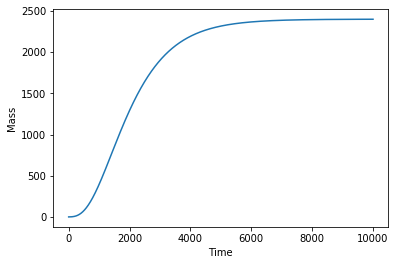

In [7]:
# numbers for  taken from west et al. 2001 table 1. for salmon(above)
results = []
time = list(range(1,10000))
for t in time:
    # should i be concrened with grams vs kg or is it scaled, would need to look
    results.append(west(M = 2400, m0 = .1, t=t, a=.026))
    
results
plt.figure()
plt.plot(time, results)
plt.ylabel("Mass")
plt.xlabel("Time")
    
    

In [8]:
def rep_growth(m, m_alpha = 10000, a = 2.15, c = 0.17, rho = 0.06): 
    """
    test of the intergrated equation from west et al 2001. 
    for predicting change in mass over time. default weights are in grams and times in days
    NOTE: assuming that M = m_alpha
    Arguments:
        m {float} -- mass at start of times step (g)
        m_alpha {float} -- asymtotic mass (g)
        a {float} -- growth rate (UNITS?)
        b {float} -- maintenace cost per cell
        c {float} -- reproductive cost (UNITS?)}
        rho {float} -- scaling factor of reproduction (UNITS?)

        

    Returns:
        {float} -- rate of change of mass in grams^1/4 per day (g^1/4 d^-1)
    """
    
    dmdt = "NA"
    M = m_alpha
    b = a/(M**0.25)
    if m < 0:
        return "ERROR: m < 0"
    if m < m_alpha:
        dmdt = (a * (m**0.75)) - (b * m) 
    elif m >= m_alpha:
        dmdt = (a * (m**0.75)) - (b * m) - (c * (m**rho))

    return dmdt

try the same as above function but with t as the input

In [9]:
def rep_growth_t(t, m, alpha = 50, M = 1000, a = 2.15, c = 0.17, rho = 0.06): 
    """
    test of the intergrated equation from west et al 2001. 
    for predicting change in mass over time. default weights are in grams and times in days
    
        Arguments:
        m {float} -- mass at start of times step (g)
        m_alpha {float} -- asymtotic mass (g)
        a {float} -- growth rate (UNITS?)
        b {float} -- maintenace cost per cell
        c {float} -- reproductive cost (UNITS?)}
        rho {float} -- scaling factor of reproduction (UNITS?)
        
    Returns:
        {float} -- rate of change of mass in grams^1/4 per day (g^1/4 d^-1)
    """
    
    dmdt = "NA" 
    b = a/(M**0.25)
    if t < 0:
        return "ERROR: t < 0"
    if t < alpha:
        dmdt = (a * (m**0.75)) - (b * m)
    elif t >= alpha:
        dmdt = (a * (m**0.75)) - (b * m) - (c * (m**rho))
    if dmdt < 0:
        dmdt = 0


    return dmdt

In [10]:
## tmp working cell for debugging
from scipy import integrate
from scipy import zeros
import matplotlib.pyplot as plt

reps = 1000
t = list(range(reps))
m0 = 0.000001
M = 1000
m = [0]*reps
inter = [0]*reps
inter[0] = m0
ode = zeros(reps)
ode[0] = m0
m[0] = m0
dmdt = [0]

## define vars for integration


alpha = 300
M = 1000
a = 0.15
c = 0.5
rho = 0.1

t_inter = np.linspace(1, 100, 100)

for i in range(1,reps):
    dmdt.append(rep_growth_t(i,m[i-1]))
    m[i] = m[i-1]+(rep_growth_t(i, m[i-1], alpha, M, a, c, rho))
    inter[i], error = integrate.quad(rep_growth_t, 0, t[i], args = (inter[i-1], alpha, M, a, c, rho))
for i in range(1,reps):
    ode[i], infodict = integrate.odeint(rep_growth_t, m0, t, args = (alpha, M, a, c, rho), full_output = True)
    
# plt.figure()
# plt.plot(t, ode)
# plt.ylabel("Mass")
# plt.xlabel("Time")



NameError: name 'np' is not defined

In [ ]:
inter[300:]

In [ ]:
# plt.figure()
# plt.plot(t, ode)
# plt.ylabel("Mass")
# plt.xlabel("Time")

plt.figure()
plt.plot(t, inter)
plt.ylabel("Mass")
plt.xlabel("Time")

##### Looking at how dm/dt changes with mass

In [ ]:
m = list(range(0,15000))
results = []
for i in m:
    results.append(rep_growth(i))
                   
plt.figure()
plt.plot(m, results)
plt.ylabel("dm/dt")
plt.xlabel("Mass")



##### Trying to understand the implimentation of the equation in code

In [ ]:


reps = 1000
t = list(range(reps))
m0 = 0.001
m = [0]*reps
m[0] = m0
dmdt = []
for i in range(1, reps):
    dmdt.append(rep_growth(m[i-1]))
    m[i] = m[i-1]+(rep_growth(m[i-1]))

                   
plt.figure()
plt.plot(t, m)
plt.ylabel("Mass (g)")
plt.xlabel("Time (days)")
rep_growth

In [ ]:
dmdt




In [ ]:
plt.figure()
plt.plot(t[0:150], m[0:150])

#### With time as the $\alpha$ marker


In [ ]:
### old work that can prob be deleted

# import scipy.integrate  as integrate

# reps = 1000
# t = list(range(reps))
# m0 = 0.000001
# m = [0]*reps
# m[0] = m0
# dmdt = []
# for i in range(1,reps):
#     dmdt.append(rep_growth_t(t = i,m = m[i-1], alpha = 50))
# #m[i] = m[i-1]+(rep_growth_t(t = i, m = m[i-1], alpha = 20, c = 20)) changed for intefrate method
#     m[i] = integrate.quad(rep_growth_t, )
                   
# plt.figure()
# plt.plot(t, m)
# plt.ylabel("Mass")
# plt.xlabel("Time")
# rep_growth_t


In [ ]:
## tmp working cell for debugging
import scipy.integrate  as integrate


reps = 1000
t = list(range(reps))
m0 = 0.000001
M = 1000
m = [0]*reps
inter = [0]*reps
inter[0] = m0
m[0] = m0
dmdt = []

## define vars for integration


alpha = 50
M = 1000
a = 2.15
c = 0.17
rho = 0.06

for i in range(1,reps):
    dmdt.append(rep_growth_t(i,m[i-1]))
    m[i] = m[i-1]+(rep_growth_t(i, m[i-1], alpha, M, a, c, rho))
    inter[i] = integrate.quad(rep_growth_t, min(t), max(t), args = (inter[i-1], alpha, M, a, c, rho))[0]
#     inter[i], error = integrate.ode(rep_growth_t, m0, t, args = (alpha, M, a, c, rho), full_output = True)
                   
plt.figure()
plt.plot(t, inter)
plt.ylabel("Mass")
plt.xlabel("Time")
rep_growth_t
inter

In [ ]:
plt.figure()
plt.plot(t[0:100], m[0:100])
plt.ylabel("Mass")
plt.xlabel("Time")


### West Equation In terms of asymptotic size $M$, i.e. $\frac{dm}{dt} = 0$

\begin{align}
    aM ^\frac{3}{4} - (b+c)M &= 0\hspace{6cm}\\
    aM ^\frac{3}{4} &= (b+c)M\\
    \frac{aM ^\frac{3}{4}}{M} &= b+c\\
    aM^\frac{-1}{4} &= b+c\\
    \frac{a}{M\frac{1}{4}} &= \frac{a}{b+c}\\
    M &= [\frac{a}{b+c}]^4\\ 
\end{align}
    

**Note** That in the Chernov et al. 2001 paper:
- $m^2$ = largest size without reproduction
    - here the derivation / rearrangement is the same only without $c$ in the denominator
- $m_\alpha$ = largest size with reproduction, i.e. with $c$
    


## Lifetime Reproduction
### Base Equation 
#### Variable Meanings
- $R_0$ = Lifetime production of offspring
- $cm$ = Reproductive allocation
- $m$ =  mass
- $\rho$ = reproductive scaling
- $h(t)$ = efficiency term representing a declining efficiency , i.e. reproductive senesence.
- $l_t$ = Probability of survival
- $L_t / L_\alpha$ = scaling factor for mature population
- $\alpha$ = feasible ages of first breeding 
- $b_t$ = effective energy allocated to reproduction
\begin{align}
    R_0 &= \int_\alpha^\infty l_t b_t dt\\
    R_0 &= \int_\alpha^\infty cm^\rho h_tl_tdt\\
\end{align}

### Derived Equation
#### Variable Meanings
- $L_\alpha$ = 
- $Z$ = Adult instantaneous mortality rate (m > $m_\alpha$)
- $\kappa$ = rate parameter, controles reproductive senesence rate
- $Z(t)$ = instantaneous mortality rate at age t
\begin{align}
    R_0 &= \int_\alpha^\infty cm^\rho h_tl_tdt\\
    &= \int_\alpha^\infty cm^\rho (t)^\rho e^{-\kappa(t-\alpha)} L_\alpha e^{Z(t-\alpha)}dt\\
    &= L_\alpha \int_\alpha^\infty cm^\rho (t)^\rho e^{-\kappa(t-\alpha)} e^{Z(t-\alpha)}dt\\
        &= cL_\alpha \int_\alpha^\infty m^\rho (t)^\rho e^{-(\kappa Z)(t-\alpha)}dt\\
    &= c\int_\alpha^\infty e^{-Z(t)} dt  \int_\alpha^\infty m(t)^\rho e^{-(\kappa +Z)(t-\alpha)}dt\\
\end{align}

Questions:
- how do you define $Z(t)$?








### Lifetime Reproduction Code

In [ ]:
from scipy.integrate import quad
def LifeReproduction(t, mt, Zt, kappa, alpha, rho = 0.06, c = 0.17):
    """
        Calculates lifetime reproductive output of an organism, 
        as described in Charnov et al. 2001.

        Arguments:
            c {float} -- 
            mt {float} -- 
            Z {float} --  
            Zt {float} --  
            kappa {float} -- 
            alpha {float} --
            t {float} --
            rho {float} -- 

        Returns:
            {float} -- lifetime reproductive output
    """
    Z = 2/alpha
    
    
    
    
    
    
    
    

#### lifetime reproduction as luke has in his notebook


working with the Cod example from `OGM_walkthrough.ipynb`

In [ ]:
from scipy import exp
from scipy import integrate
import matplotlib.pyplot as plt



def L(t, mu = 0.01):
    """
        Calculates lifetime reproductive output of an organism, 
        as described in Charnov et al. 2001.

        Arguments:
            t {int} -- time
            mu {float} -- ???
        Returns:
            {float} -- lifetime reproductive output
    """
    return exp(-mu*t)

def life_repro(t, m, c, alpha, rho):
    """
        Calculates lifetime reproductive output of an organism, 
        as described in Charnov et al. 2001.

        Arguments:
            t {int} -- time; days
            r {float} -- # not used so i removed it
            m {float} -- mass; g
            c {float} -- reproductive cost
            alpha {float} -- time of maturation; days
            rho {float} --  reproduction scaling parameter

        Returns:
            {float} -- reproductive output. 
                        NOTE: lifetime reproductive output is the integral.
    """
    Q = L(t-alpha) # ??????
    
    if t < alpha:
        dRdt = 0
    if t >= alpha:
        dRdt = Q*c * m**rho
    
    
    return dRdt

### begin testing of the functions
reps = 1000
t = list(range(1, reps))

m0 = 0.1
a = 0.017
b = 0 ## no need to calculate right now since i do it in function,could be done here to save time
c = 0.008
M = 25000
alpha = 200 # same as rho
rho = 6 # 8th ish values from lukes graph i think

r0 = 0# starting hypothetical reproduction not used so seems odd to me.
Repro = [0] * reps
m = [0] * reps
m[0] = m0
for i in t:
    m[i] = m[i-1]+(rep_growth_t(i, m[i-1], alpha, M, a, c, rho))
#     Repro[i] = life_repro(i, m[i], c, alpha, rho)
    Repro[i], error = integrate.quad(life_repro, min(t), max(t), args = (m[i-1], c, alpha, rho))#fails

life_output = sum(Repro)
life_output

In [ ]:
Repro
life_repro(20, m[20], c, 10, rho)
sum(Repro)
len(t)
Repro

In [ ]:
plt.figure()
plt.plot(t, Repro)

# Dimensional Analysis

## West et al 2001
Energy = Joules = J

Mass = Kg

Time = s

*Note*:
Watt = $W = J \cdot s^{-1}$

- **Full Equation**
    - explanation of pieces below
\begin{align}
    \frac{dm}{dt} &= \frac{m_c}{E_c} B - \frac{B_c}{E_c} m\\
    \frac{dm}{dt} &= a m^{\frac{3}{4}} - b m\\
    g \cdot s^{-1} &= s^{-1} \cdot g - s^{-1} \cdot g\\
    g \cdot s^{-1} &= g \cdot s^{-1} - g \cdot s^{-1}\\
\end{align}

- **$B$**
\begin{align}
    B &= \sum_c N_c B_c + E_c \frac{dN_c}{dt}\\
    &= 1 (J \cdot s^{-1}) + J (1 \cdot s^{-1})\\
    &= J \cdot s^{-1}\\
    &= W\\
    Also:\\
    B &= B_0 m ^\frac{3}{4}\\
    J \cdot s^{-1} &= B_0 \cdot Kg\\
    W &= B_0 \cdot Kg\\
    B_0 &= W \cdot Kg^{-1}\\
\end{align}

- **Substitute $a$ and $b$**
\begin{align}
    \frac{dm}{dt} &= a B - b m
\end{align}

- **$a$**
\begin{align}
    a &= \frac{B_0 m_c}{E_c}\\
    &= \frac{(J \cdot s^{-1}) \cdot g}{J}\\
    &= s^{-1}\\
\end{align}

- **$b$**

\begin{align}
    b &= \frac{B_c}{E_c}\\
    &= \frac{J \cdot s^{-1}}{J}\\
    &= s^{-1}\\
\end{align}

## Charnov et al 2001
- Basic form
    - Time = seconds = s
    - mass = grams = g
    - dimensionless = 1
\begin{align}
    R_0 &= \int_\alpha^\infty l_t b_t dt\\
    &= \int_\alpha^\infty (1 \cdot s^{-1}) \cdot s^{-1} dt\\
    &= (1 \cdot s^{-1}) \cdot s^{-1} \cdot s\\
    &= 1 \cdot s^{-1}\\
\end{align}
    - NOTE: units are odd and need to be looked at better.
- with substitutions --> Eq(7) from Luke's SI.
\begin{align}
    R_0 &= c\int_\alpha^\infty e^{-Z(t)} dt  \int_\alpha^\infty m(t)^\rho e^{-(\kappa +Z)(t-\alpha)}dt\\
    &= s^{-1} \cdot e^{\int_0^\alpha -Z(t) dt} \int_\alpha^\inf m(t)^\rho e^{-(\kappa+Z)(t-\alpha)}dt\\ 
    &= s^{-1} \cdot e^{\int_0^\alpha -s^{-1} dt} \int_\alpha^\inf g^1 \cdot e^{-(s^{-1}+s^{-1})(s-s)}dt\\
        &= s^{-1} \cdot e^{\int_0^\alpha -s^{-1} dt} \int_\alpha^\inf g^1 \cdot e^{-(1)}dt\\
    &= s^{-1} \cdot e^{-s^{-1} s} \cdot g^1 \cdot e^{-(1)} \cdot s\\
    &= s^{-1} \cdot s \cdot e^{-s^{-1} s} \cdot g^1 \cdot e^{-(1)} \\
    &= g
\end{align}

# Notes
## Charnov et al 2001
-  the model is designed for indeterminate growers 
    - i.e. fish and reptiles
        - lizards weakly supported the model and snakes did not
        - determinate growers; birds, mammals and insects can't be used wiht the model
- $\frac{c}{b} = q $ and is fixed? 
- given $\frac{\alpha}{E} = 2$
    - $cE \approx 0.6$ 
    - $q \approx 3-5$
    - $bE \approx 0.15$
    
- $cm$ is optimised with respect to $Z$, but a shorter life span ($Z$) leads to a higher per time investment into reproduction, i.e. higher $cm$
- $\frac{1}{Z}$ = average adult lifespan
- $\frac{c}{Z} \approx 0.6$ --> lifetime reproductive output 
    - this is a reorganisation of $cE$ because $E = \frac{1}{Z}$
        - $cE$ is derived from $ \frac{bq}{Z}$?
- "a female fish expends a mass equal to about 60% of her average adult body mass per lifetime of reproduction (Fig. 4). This number (0.6) is very low when compared with, say, altricial birds, where a typical female rears about five daughters over a lifetime, each fed to adult size, so that $cE \approx 5$. One wonders why birds are almost 10 times more productive by this measure (flight? endothermy? habitat productivity?)." - page 4

## Looking at $R_0$
\begin{align}
    R_0 &= \int_\alpha^\infty cm^\rho h_tl_tdt\\
    &and\\
    \frac{dm}{dt} &= am^\frac{3}{4} - bm - cm^\rho  &m \ge m_\alpha \\
\end{align}

- from Charnov et al 2007 
    - The optimal size at first reproduction ($m_\alpha$) will maximize $R_0$. It is found by setting $\partial R /\partial \alpha = 0$.

## possible data sources
- Z values - Pauley 1980 as noted in Savage et al 2004 ("Effects of body size and temperature on population growth)~

# Further Questions
- semeloparous (i.e. salmonids; can talk to olivia morris) VS iteroparous species.
    - Do they differ massively in the numbers produced during maximisation?

# Papers to read
- charnov 1990/2001 - why is the equation for juvenile suvivorship $l_t = e^{-z(t)}$ --> page 10-ish of luke's
- Stearns, 1992 - $\rho$? - its a book and don't have access right now. 
    

## Questions:
- what is $\rho$ in:
\begin{align}
    R_0 &= \int_\alpha^\infty cm^\rho h_tl_tdt\\
    &and\\
    \frac{dm}{dt} &= am^\frac{3}{4} - bm - cm^\rho  &m \ge m_\alpha \\
\end{align}
<p>&nbsp;</p> 

    - a means of explaining the transition in energy investment as maturity is reached?
- Where are many of the numbers coming from / how are they calculated?
    - b -- worked back from M?
    - $\rho$ - scaling of reproduction
    


# Misgivings about models

## West et al 2001
- b is based on asymtotic mass where there is no reproduction

## Charnov et al 2001

# Code Testing


## Intergration

In [2]:
from scipy import integrate
# testing with single arguments 
def f(x):
    return x**2
def df(x):
    return 2*x

dfstore = list()
xstore = list()
for i in range(1,5):
    dfstore.append(integrate.quad(df, 0, i)[0])
    xstore.append(f(i))
print(dfstore)
print(xstore)

[1.0, 4.0, 9.0, 16.0]
[1, 4, 9, 16]


In [1]:
from scipy import integrate
# testing with double arguments 
def f(x, y):
    return (x**2) + (x*y)
def df(x,y):
    return (2*x) + y
y = 3
dfstore = list()
xstore = list()
for i in range(1,5):
    dfstore.append(integrate.quad(df, 0, i, args = (y))[0])
    xstore.append(f(i, y))
print(dfstore)
print(xstore)

[4.0, 10.0, 18.0, 28.0]
[4, 10, 18, 28]
